<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220920_MNIST_%EC%8B%A4%EC%8A%B503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive /mydrive

In [ ]:
%cd /mydrive

/content/drive/MyDrive


In [ ]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


## __callback/가중치규제/드롭아웃 활용__

### **1. Library Import**

In [ ]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **2. 데이터 확인 및 전처리**

In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [ ]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __try04 CNN 모델에 callback 적용__

---
EarlyStopping / ModelCheckPoint

In [ ]:
import keras                                               # histroy 함수를 위해 import

In [ ]:
model_4 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:
model_4.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('mnist/model_4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_4 = model_4.fit(train_imgs, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/50
742/750 [============================>.] - ETA: 0s - loss: 2.1323 - accuracy: 0.3606
Epoch 1: val_accuracy improved from -inf to 0.66125, saving model to mnist/best_model.h1
750/750 [==============================] - 20s 10ms/step - loss: 2.1249 - accuracy: 0.3636 - val_loss: 1.4390 - val_accuracy: 0.6612
Epoch 2/50
747/750 [============================>.] - ETA: 0s - loss: 0.8412 - accuracy: 0.8066
Epoch 2: val_accuracy improved from 0.66125 to 0.87358, saving model to mnist/best_model.h1
750/750 [==============================] - 7s 9ms/step - loss: 0.8401 - accuracy: 0.8069 - val_loss: 0.5399 - val_accuracy: 0.8736
Epoch 3/50
750/750 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.8840
Epoch 3: val_accuracy improved from 0.87358 to 0.90575, saving model to mnist/best_model.h1
750/750 [==============================] - 5s 6ms/step - loss: 0.4778 - accuracy: 0.8840 - val_loss: 0.3831 - val_accuracy: 0.9057
Epoch 4/50
741/750 [========================

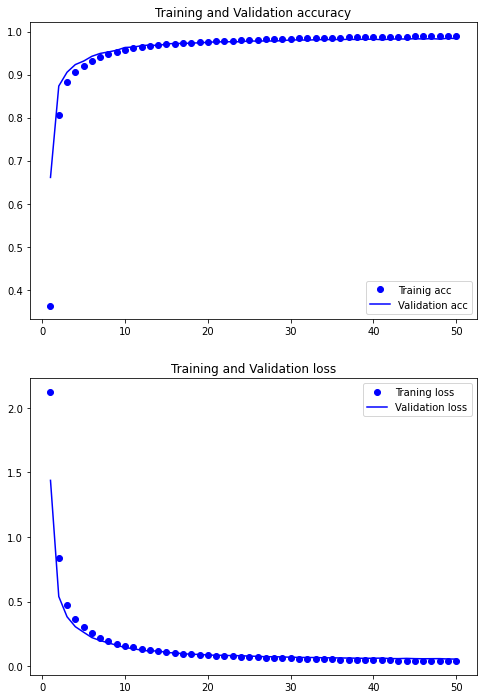

In [ ]:
acc = hist_4.history['accuracy']
val_acc = hist_4.history['val_accuracy']
loss = hist_4.history['loss']
val_loss = hist_4.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_4.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9873


[0.04370482638478279, 0.9872999787330627]

In [ ]:
model_4_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])

In [ ]:
model_4_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('mnist/model_4_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_4_1 = model_4_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/30
741/750 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9334
Epoch 1: val_accuracy improved from -inf to 0.97950, saving model to mnist/best_model.h2
750/750 [==============================] - 6s 8ms/step - loss: 0.2122 - accuracy: 0.9338 - val_loss: 0.0698 - val_accuracy: 0.9795
Epoch 2/30
748/750 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9823
Epoch 2: val_accuracy improved from 0.97950 to 0.98325, saving model to mnist/best_model.h2
750/750 [==============================] - 5s 7ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0588 - val_accuracy: 0.9833
Epoch 3/30
747/750 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.9873
Epoch 3: val_accuracy improved from 0.98325 to 0.98783, saving model to mnist/best_model.h2
750/750 [==============================] - 5s 7ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 4/30
745/750 [==========================

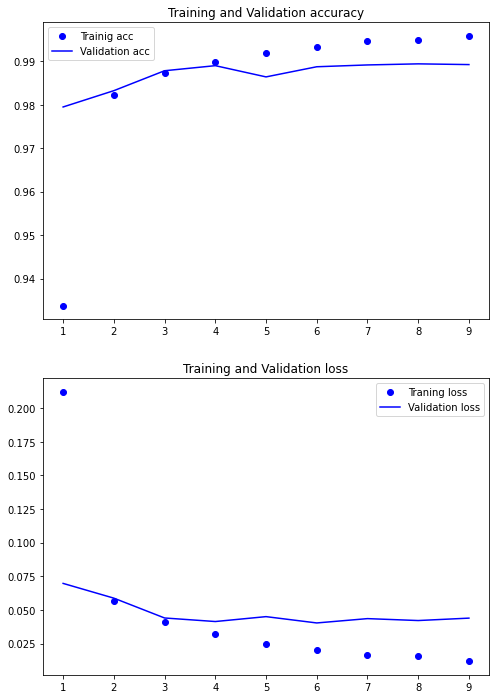

In [ ]:
acc = hist_4_1.history['accuracy']
val_acc = hist_4_1.history['val_accuracy']
loss = hist_4_1.history['loss']
val_loss = hist_4_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_4_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9898


[0.033344052731990814, 0.989799976348877]

In [ ]:
model_4_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])

In [ ]:
model_4_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('mnist/model_4_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_4_2 = model_4_2.fit(train_imgs, train_labels, epochs=30, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/30
372/375 [============================>.] - ETA: 0s - loss: 0.4019 - accuracy: 0.8971
Epoch 1: val_accuracy improved from -inf to 0.97250, saving model to mnist/best_model.h3
375/375 [==============================] - 8s 18ms/step - loss: 0.3996 - accuracy: 0.8977 - val_loss: 0.1060 - val_accuracy: 0.9725
Epoch 2/30
374/375 [============================>.] - ETA: 0s - loss: 0.0877 - accuracy: 0.9751
Epoch 2: val_accuracy improved from 0.97250 to 0.98275, saving model to mnist/best_model.h3
375/375 [==============================] - 4s 12ms/step - loss: 0.0876 - accuracy: 0.9751 - val_loss: 0.0618 - val_accuracy: 0.9827
Epoch 3/30
372/375 [============================>.] - ETA: 0s - loss: 0.0551 - accuracy: 0.9834
Epoch 3: val_accuracy did not improve from 0.98275
375/375 [==============================] - 4s 11ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0579 - val_accuracy: 0.9826
Epoch 4/30
372/375 [============================>.] - ETA: 0s - loss: 0.0408 - accur

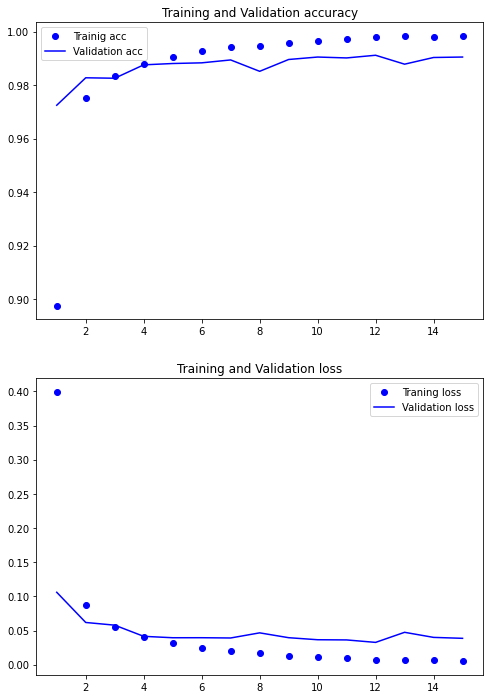

In [ ]:
acc = hist_4_2.history['accuracy']
val_acc = hist_4_2.history['val_accuracy']
loss = hist_4_2.history['loss']
val_loss = hist_4_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_4_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9910


[0.03353824093937874, 0.9909999966621399]

### __try05 가중치 규제 추가(kernel_regularizer)__

In [ ]:
from keras import regularizers

In [ ]:
model_5 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_3 (Flatten)         (None, 288)              

In [ ]:
model_5.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_5 = model_5.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 2.4717 - accuracy: 0.2852 - val_loss: 2.2336 - val_accuracy: 0.6183
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 1.3493 - accuracy: 0.7635 - val_loss: 0.8626 - val_accuracy: 0.8647
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.7718 - accuracy: 0.8734 - val_loss: 0.6582 - val_accuracy: 0.9007
Epoch 4/30
750/750 [==============================] - 5s 6ms/step - loss: 0.6353 - accuracy: 0.8984 - val_loss: 0.5769 - val_accuracy: 0.9143
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.5627 - accuracy: 0.9140 - val_loss: 0.5109 - val_accuracy: 0.9308
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.5119 - accuracy: 0.9254 - val_loss: 0.4711 - val_accuracy: 0.9401
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.4718 - accuracy: 0.9344 - val_loss: 0.4385 - val_accuracy: 0.9447
Epoch 

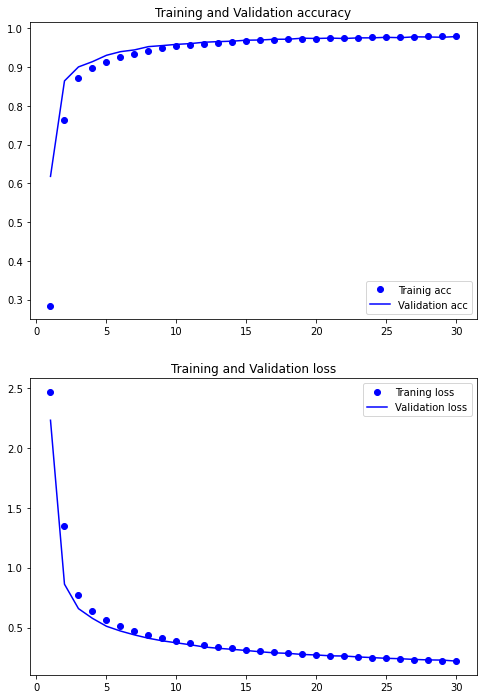

In [ ]:
acc = hist_5.history['accuracy']
val_acc = hist_5.history['val_accuracy']
loss = hist_5.history['loss']
val_loss = hist_5.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_5.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2110 - accuracy: 0.9813


[0.21098144352436066, 0.9812999963760376]

In [ ]:
model_5_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])
model_5_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_4 (Flatten)         (None, 288)              

In [ ]:
model_5_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_5_1 = model_5_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.3834 - accuracy: 0.9289 - val_loss: 0.2186 - val_accuracy: 0.9732
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1939 - accuracy: 0.9754 - val_loss: 0.1785 - val_accuracy: 0.9764
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1610 - accuracy: 0.9808 - val_loss: 0.1486 - val_accuracy: 0.9835
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1423 - accuracy: 0.9819 - val_loss: 0.1365 - val_accuracy: 0.9834
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1297 - accuracy: 0.9841 - val_loss: 0.1307 - val_accuracy: 0.9847
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1196 - accuracy: 0.9850 - val_loss: 0.1455 - val_accuracy: 0.9777
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1156 - accuracy: 0.9846 - val_loss: 0.1152 - val_accuracy: 0.9856
Epoch 

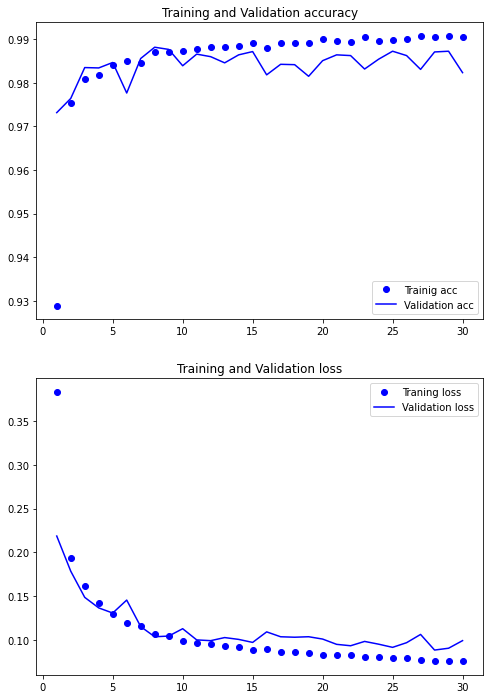

In [ ]:
acc = hist_5_1.history['accuracy']
val_acc = hist_5_1.history['val_accuracy']
loss = hist_5_1.history['loss']
val_loss = hist_5_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_5_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.9856


[0.0913868322968483, 0.9855999946594238]

In [ ]:
model_5_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_5_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_5 (Flatten)         (None, 288)              

In [ ]:
model_5_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_5_2 = model_5_2.fit(train_imgs, train_labels, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 11ms/step - loss: 0.5967 - accuracy: 0.8885 - val_loss: 0.2711 - val_accuracy: 0.9656
Epoch 2/30
375/375 [==============================] - 4s 11ms/step - loss: 0.2362 - accuracy: 0.9689 - val_loss: 0.1872 - val_accuracy: 0.9797
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1826 - accuracy: 0.9759 - val_loss: 0.1736 - val_accuracy: 0.9770
Epoch 4/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1569 - accuracy: 0.9794 - val_loss: 0.1447 - val_accuracy: 0.9819
Epoch 5/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1425 - accuracy: 0.9814 - val_loss: 0.1338 - val_accuracy: 0.9829
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1324 - accuracy: 0.9828 - val_loss: 0.1242 - val_accuracy: 0.9850
Epoch 7/30
375/375 [==============================] - 4s 10ms/step - loss: 0.1249 - accuracy: 0.9836 - val_loss: 0.1284 - val_accuracy: 0.9816

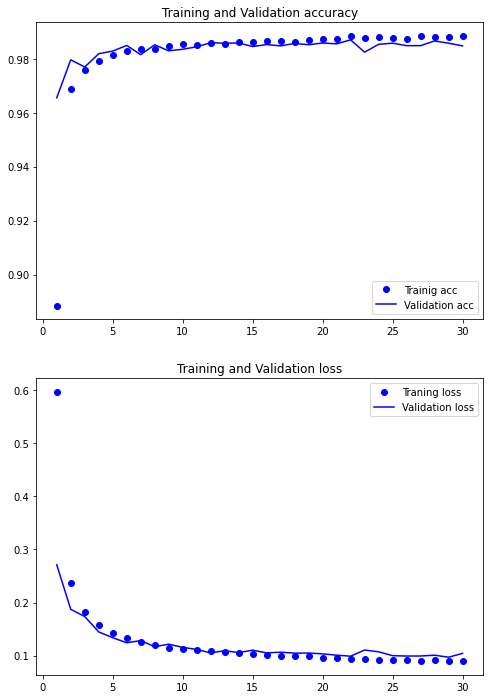

In [ ]:
acc = hist_5_2.history['accuracy']
val_acc = hist_5_2.history['val_accuracy']
loss = hist_5_2.history['loss']
val_loss = hist_5_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_5_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0926 - accuracy: 0.9863


[0.09256935119628906, 0.986299991607666]

In [ ]:
model_5_3 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])
model_5_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_10 (Flatten)        (None, 288)             

In [ ]:
model_5_3.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_5_3 = model_5_3.fit(train_imgs, train_labels, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 11ms/step - loss: 0.4468 - accuracy: 0.9116 - val_loss: 0.2539 - val_accuracy: 0.9655
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.2072 - accuracy: 0.9739 - val_loss: 0.1731 - val_accuracy: 0.9813
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1617 - accuracy: 0.9803 - val_loss: 0.1594 - val_accuracy: 0.9770
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.1386 - accuracy: 0.9819 - val_loss: 0.1300 - val_accuracy: 0.9837
Epoch 5/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1240 - accuracy: 0.9840 - val_loss: 0.1276 - val_accuracy: 0.9807
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1135 - accuracy: 0.9851 - val_loss: 0.1115 - val_accuracy: 0.9862
Epoch 7/30
375/375 [==============================] - 4s 11ms/step - loss: 0.1066 - accuracy: 0.9860 - val_loss: 0.1120 - val_accuracy: 0.9840

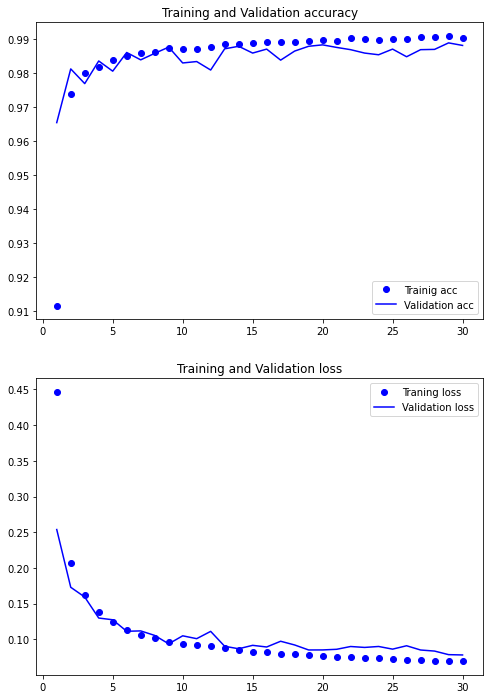

In [ ]:
acc = hist_5_3.history['accuracy']
val_acc = hist_5_3.history['val_accuracy']
loss = hist_5_3.history['loss']
val_loss = hist_5_3.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_5_3.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9896


[0.06978685408830643, 0.9896000027656555]

### __try06 드롭아웃 추가(Dropout)__

In [ ]:
model_6 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 32)         

In [ ]:
model_6.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_6 = model_6.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 1.9734 - accuracy: 0.3852 - val_loss: 1.2412 - val_accuracy: 0.7466
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.8643 - accuracy: 0.7746 - val_loss: 0.6060 - val_accuracy: 0.8739
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.5725 - accuracy: 0.8483 - val_loss: 0.4295 - val_accuracy: 0.9062
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.4373 - accuracy: 0.8836 - val_loss: 0.3254 - val_accuracy: 0.9274
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3546 - accuracy: 0.9042 - val_loss: 0.2715 - val_accuracy: 0.9373
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2976 - accuracy: 0.9189 - val_loss: 0.2229 - val_accuracy: 0.9469
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2611 - accuracy: 0.9268 - val_loss: 0.1941 - val_accuracy: 0.9528
Epoch 

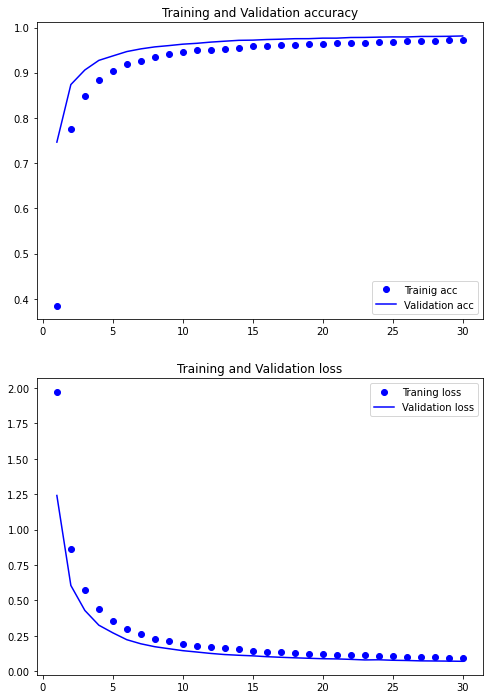

In [ ]:
acc = hist_6.history['accuracy']
val_acc = hist_6.history['val_accuracy']
loss = hist_6.history['loss']
val_loss = hist_6.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_6.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9826


[0.061522796750068665, 0.9825999736785889]

In [ ]:
model_6_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_6_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 32)         

In [ ]:
model_6_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_6_1 = model_6_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.3729 - accuracy: 0.9032 - val_loss: 0.0877 - val_accuracy: 0.9777
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0947 - accuracy: 0.9726 - val_loss: 0.0665 - val_accuracy: 0.9815
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.0504 - val_accuracy: 0.9852
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0375 - val_accuracy: 0.9890
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.0381 - val_accuracy: 0.9886
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0317 - val_accuracy: 0.9909
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0304 - val_accuracy: 0.9915
Epoch 

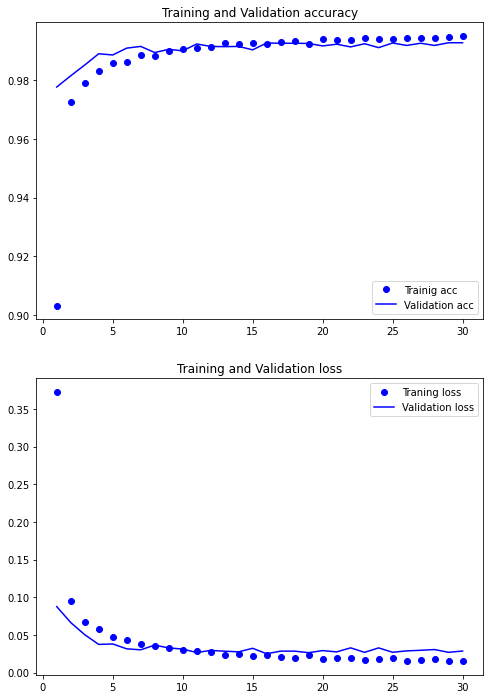

In [ ]:
acc = hist_6_1.history['accuracy']
val_acc = hist_6_1.history['val_accuracy']
loss = hist_6_1.history['loss']
val_loss = hist_6_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_6_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9928


[0.024817416444420815, 0.9927999973297119]

In [ ]:
model_6_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_6_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 32)         

In [ ]:
model_6_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_6_2 = model_6_2.fit(train_imgs, train_labels, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 11ms/step - loss: 0.4510 - accuracy: 0.8823 - val_loss: 0.1336 - val_accuracy: 0.9652
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.1171 - accuracy: 0.9658 - val_loss: 0.0668 - val_accuracy: 0.9806
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0775 - accuracy: 0.9770 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.0491 - val_accuracy: 0.9862
Epoch 5/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0502 - val_accuracy: 0.9847
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0393 - val_accuracy: 0.9879
Epoch 7/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9898

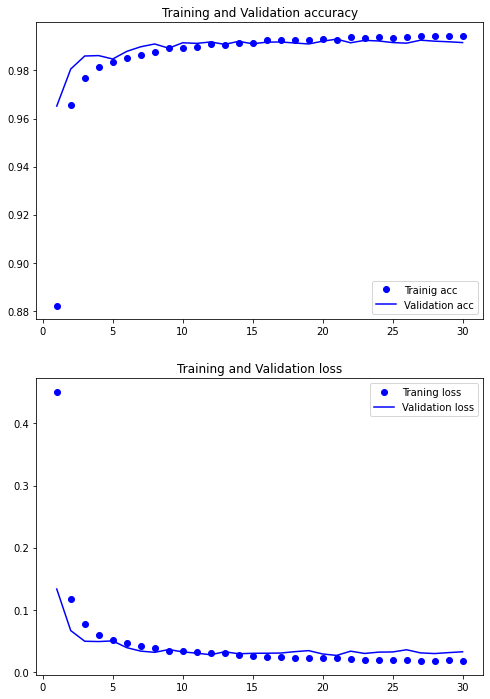

In [ ]:
acc = hist_6_2.history['accuracy']
val_acc = hist_6_2.history['val_accuracy']
loss = hist_6_2.history['loss']
val_loss = hist_6_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
model_6_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0221 - accuracy: 0.9934


[0.02206776849925518, 0.993399977684021]